/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Training R² Score: 1.0000
Training Mean Squared Error (MSE): 0.2489
Testing R² Score: 0.1291
Testing Mean Squared Error (MSE): 17235.3977


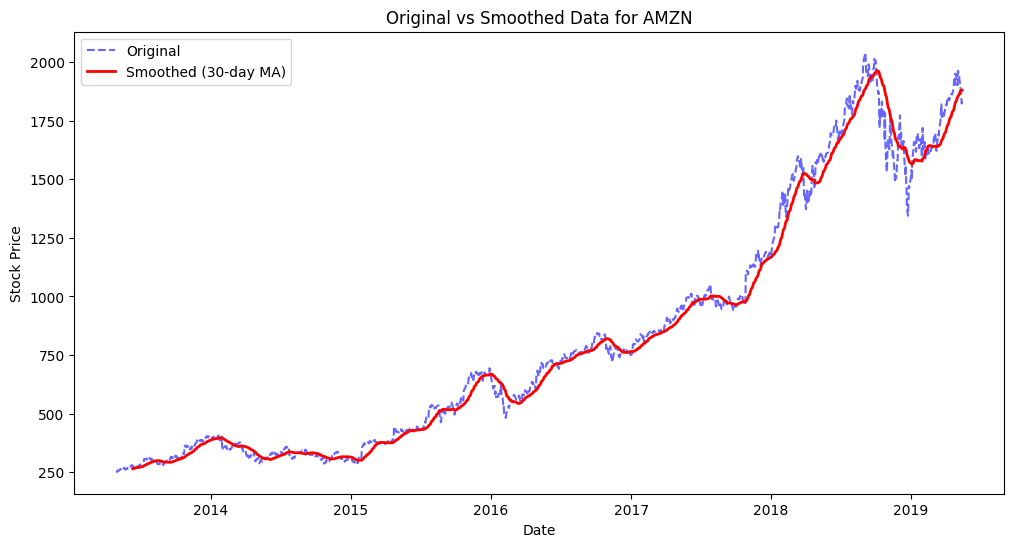

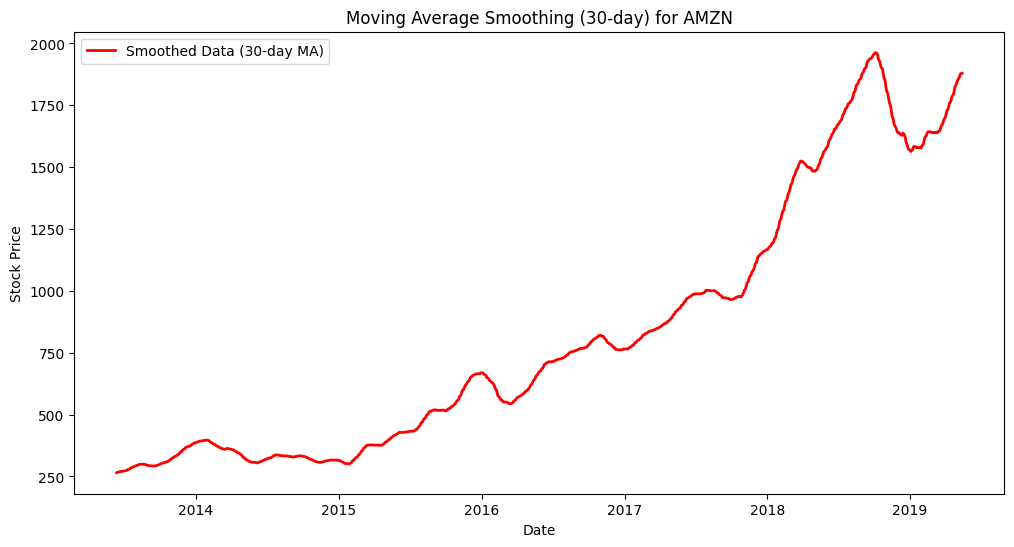

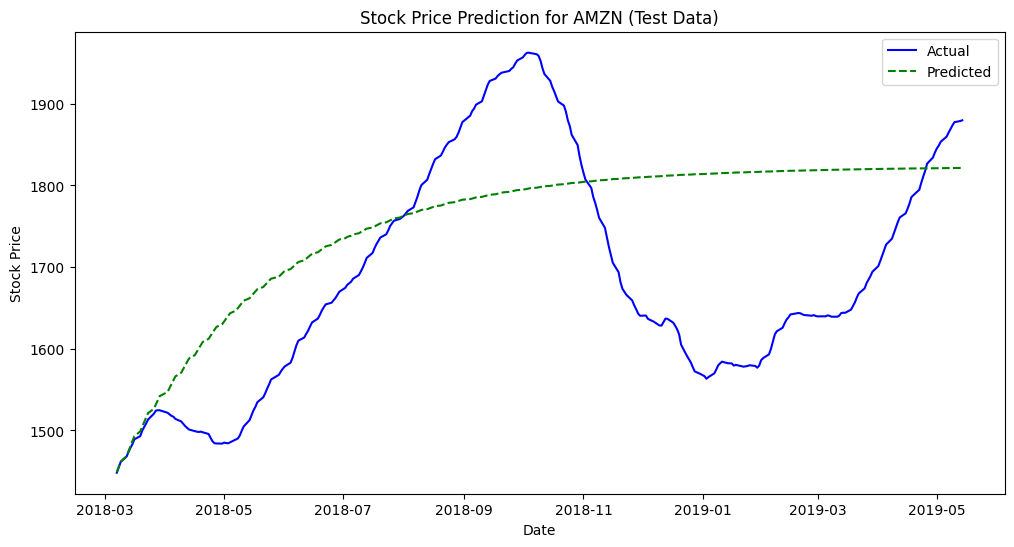

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
file_path = "/content/portfolio_data.csv"
df = pd.read_csv(file_path)

# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Apply a 30-day moving average
window_size = 30
df_smooth = df.rolling(window=window_size).mean()

# Select a stock symbol (AMZN) for forecasting
stock_symbol = "AMZN"

# Drop NaN values from moving average calculation
df_smooth_filtered = df_smooth.dropna()

# Split data into training (80%) and testing (20%)
train_size = int(len(df_smooth_filtered) * 0.8)
train_data, test_data = df_smooth_filtered.iloc[:train_size], df_smooth_filtered.iloc[train_size:]

# Train ARIMA model on training data
model = ARIMA(train_data[stock_symbol], order=(5,1,0))  # ARIMA(p,d,q) with p=5, d=1, q=0
model_fit = model.fit()

# Forecast on training & testing sets
train_predictions = model_fit.fittedvalues  # In-sample predictions
test_predictions = model_fit.predict(start=len(train_data), end=len(df_smooth_filtered)-1)

# Calculate R² Score and MSE for Training Data
r2_train = r2_score(train_data[stock_symbol][1:], train_predictions[1:])  # Ignore first NaN value
mse_train = mean_squared_error(train_data[stock_symbol][1:], train_predictions[1:])

# Calculate R² Score and MSE for Testing Data
r2_test = r2_score(test_data[stock_symbol], test_predictions)
mse_test = mean_squared_error(test_data[stock_symbol], test_predictions)

# Print results
print(f"Training R² Score: {r2_train:.4f}")
print(f"Training Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Testing R² Score: {r2_test:.4f}")
print(f"Testing Mean Squared Error (MSE): {mse_test:.4f}")

# Plot original vs. smoothed data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[stock_symbol], label="Original", linestyle="dashed", alpha=0.6, color='blue')
plt.plot(df_smooth.index, df_smooth[stock_symbol], label=f"Smoothed ({window_size}-day MA)", linewidth=2, color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"Original vs Smoothed Data for {stock_symbol}")
plt.legend()
plt.show()

# Plot only the moving average
plt.figure(figsize=(12, 6))
plt.plot(df_smooth.index, df_smooth[stock_symbol], label=f"Smoothed Data ({window_size}-day MA)", linewidth=2, color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"Moving Average Smoothing ({window_size}-day) for {stock_symbol}")
plt.legend()
plt.show()

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data[stock_symbol], label="Actual", color="blue")
plt.plot(test_data.index, test_predictions, label="Predicted", linestyle="dashed", color="green")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"Stock Price Prediction for {stock_symbol} (Test Data)")
plt.legend()
plt.show()
